<a href="https://colab.research.google.com/github/Yesha2601/MyFirstPortfolio/blob/main/RAI_EXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install -q kaggle


In [16]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeshaparikh","key":"f0e013ed585870d75a4e3d433a14dbc3"}'}

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [18]:
import os
os.environ['KAGGLE_USERNAME'] = "your_kaggle_yeshaparikh"
os.environ['KAGGLE_KEY'] = "your_kaggle_f0e013ed585870d75a4e3d433a14dbc3"


In [19]:
!kaggle datasets download -d zynicide/wine-reviews -p ./data --unzip


Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0
  0% 0.00/50.9M [00:00<?, ?B/s]
100% 50.9M/50.9M [00:00<00:00, 1.08GB/s]


In [20]:
import os
print(os.listdir('./data'))  # Should list downloaded files.


['winemag-data-130k-v2.json', 'winemag-data_first150k.csv', 'winemag-data-130k-v2.csv']


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
data = pd.read_csv('./data/winemag-data-130k-v2.csv')
data = data.dropna(subset=['points'])  # Target column must not have NaN
features = data.select_dtypes(include=[np.number]).drop('points', axis=1).fillna(0)
labels = data['points']

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)
# For RNN/LSTM, input must be 3D: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [25]:
model_rnn = keras.Sequential([
    layers.SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
history_rnn = model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 4074.0784 - val_loss: 25.4868
Epoch 2/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 14.6283 - val_loss: 10.8417
Epoch 3/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 10.3577 - val_loss: 9.7880
Epoch 4/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 9.3845 - val_loss: 9.4140
Epoch 5/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 9.2070 - val_loss: 9.0482


In [27]:
model_lstm = keras.Sequential([
    layers.LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3250/3250 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 4804.4321 - val_loss: 123.3201
Epoch 2/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 49.7037 - val_loss: 12.6929
Epoch 3/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 11.8653 - val_loss: 10.5355
Epoch 4/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 10.0058 - val_loss: 9.5971
Epoch 5/5
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 9.3787 - val_loss: 9.3595


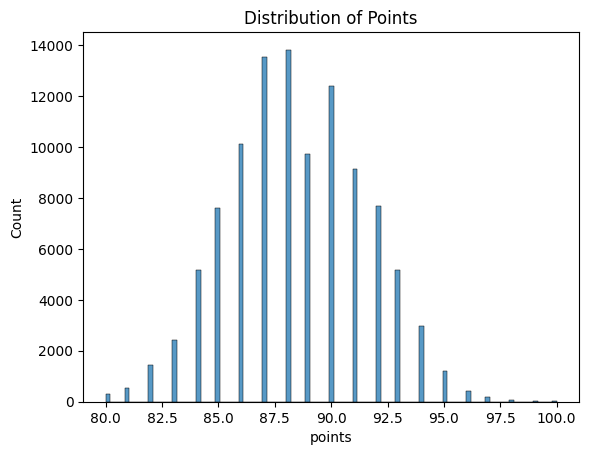

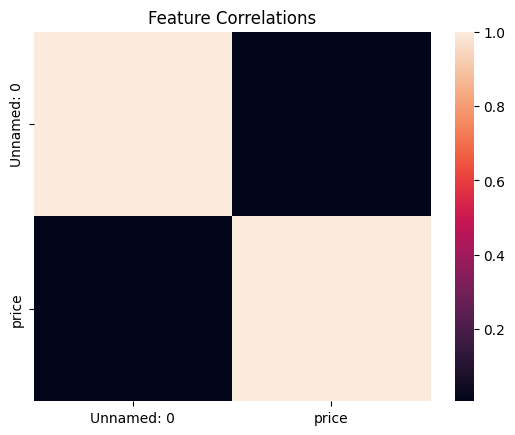

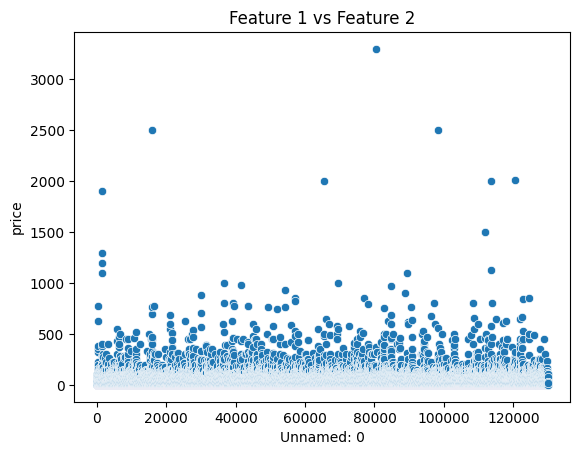

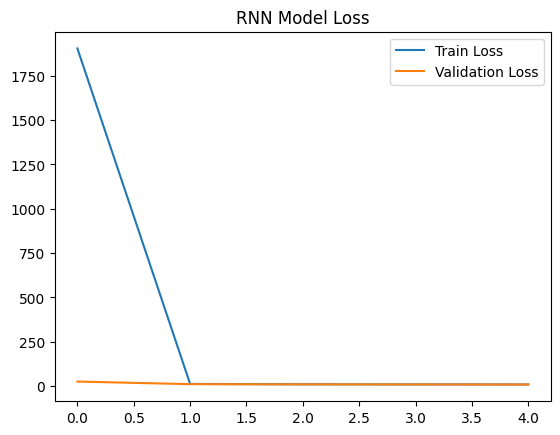

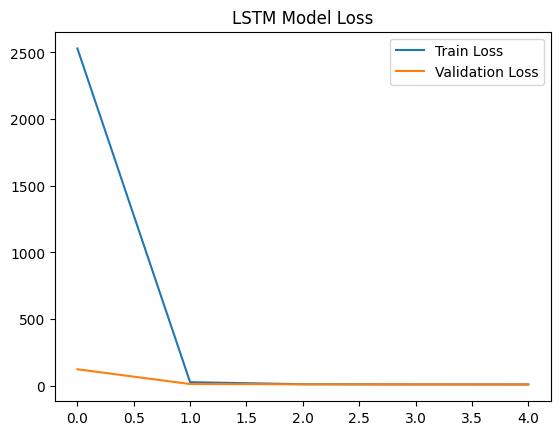

In [28]:
# 1. Histogram of the target values
plt.figure()
sns.histplot(y_train)
plt.title('Distribution of Points')
plt.show()

# 2. Correlation heatmap for numeric features
plt.figure()
sns.heatmap(features.corr())
plt.title('Feature Correlations')
plt.show()

# 3. Scatter plot of two features (pick any)
plt.figure()
sns.scatterplot(x=features.iloc[:, 0], y=features.iloc[:, 1])
plt.title('Feature 1 vs Feature 2')
plt.show()

# 4. Training and validation loss for RNN
plt.figure()
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.legend()
plt.show()

# 5. Training and validation loss for LSTM
plt.figure()
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.legend()
plt.show()
